# 実験計画(Design of Experiments)
基本的にリソースが有限である化学・材質・バイオ関係の研究では試薬や材料を使える回数が限られる。そこで、直行表を使うことで少ない回数の実験で有効的な知見を得る必要がある。今回は典型例として各2水準で4因子の場合のL8で行う(データは筆者が覚えやすいプログラミング言語の特徴を5段階で独断と偏見で評価した物)。

# ライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データセットの読み込み

In [ ]:
df = pd.read_csv("DoE_result.csv", encoding="shift-jis")
df

,var,pointa,code,func,y
0,static,Yes,few,many,3
1,dynamic,Yes,few,few,2
2,static,No,few,few,4
3,dynamic,No,few,many,5
4,static,Yes,many,many,3
5,dynamic,Yes,many,few,1
6,static,No,many,few,3
7,dynamic,No,many,many,3


# 因子と水準ごとに分布を作成

In [ ]:
y_name = "y"
y = df[y_name]
x = df.drop(y_name, axis=1)
data = []
name = []
ave = []
pos = []
apos = []
tmp_data = []
tmp_ave = []
tmp_pos = []
i = 0
for col in x.columns:
    arr = x[col].values
    arr = list(set(arr))
    for row in arr:
        df_q = df.query("%s=='%s'"%(col, row))
        data.append(df_q[y_name].values)
        tmp_data.append(df_q[y_name].values)
        tmp_pos.append(i)
        mean = np.array(tmp_data)
        tmp_ave.append(np.mean(mean))
        pos.append(i)
        i = i + 1
        name.append("%s_%s"%(col, row))
    tmp_data = np.array(tmp_data)
    ave.append(tmp_ave)
    apos.append(tmp_pos)
    tmp_data = []
    tmp_ave = []
    tmp_pos = []

# データの可視化

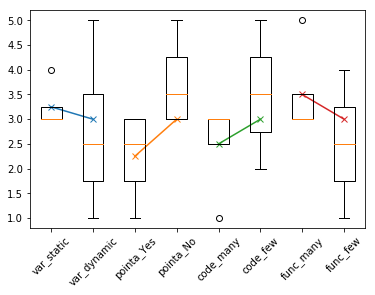

In [ ]:
for i in range(len(ave)):
    plt.plot(apos[i],ave[i],marker="x")
plt.boxplot(data,labels=name,positions=pos)
plt.xticks(rotation=45)
plt.show()